# 1.Business Problem Understanding

- With growing demands and cut-throat competitions in the market, a Superstore Giant is seeking your knowledge in understanding what works best for them. They would like to understand which products, regions, categories and customer segments they should target or avoid.
- You can even take this a step further and try and build a Regression model to predict Sales or Profit.
- Go crazy with the dataset, but also make sure to provide some business insights to improve.

**Business Context**
- You are performing exploratory data analysis (EDA) and potentially predictive modeling to:
- Identify profitable and unprofitable products.
- Detect which customer segments and regions drive the most profit.
- Analyze discounts and their effect on profitability.
- Recommend where to cut costs, boost marketing, or discontinue products.

**Business Objective**
- The goal of this project is to explore and analyze the Superstore dataset to uncover patterns and trends in sales, profit, discount, and customer segments. The insights derived will help businesses make informed decisions to improve performance and profitability.


# 2.Data Undersatnad & Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\kolli\Downloads\my own project datasets\Sample - Superstore.csv", encoding='latin1')
pd.set_option('display.max_columns', None)

**a.Load the Data**

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


**Observe the first 5 rows of data**

In [4]:
df.shape

(9994, 21)

**The dataset has 9994 rows and 21 columns**

In [5]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

**Convert the order date & ship date object to date format**

In [6]:
df.columns.tolist()

['Row ID',
 'Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit']

**Converting column names to list for easy checking the column names**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

**It shows the overall date it is not containing null values and also show data types**

In [8]:
df['Row ID'].unique()

array([   1,    2,    3, ..., 9992, 9993, 9994])

**All unique values of row id**

In [9]:
df['Row ID'].nunique()

9994

**No of unique values is 9994**

In [10]:
df['Order ID'].unique()

array(['CA-2016-152156', 'CA-2016-138688', 'US-2015-108966', ...,
       'CA-2014-110422', 'CA-2017-121258', 'CA-2017-119914'], dtype=object)

**Unique values of order id**

In [11]:
df['Order ID'].nunique()

5009

**No of unique valuesis 5009**

In [12]:
df['Order Date'].unique()

array(['11/8/2016', '6/12/2016', '10/11/2015', ..., '6/3/2016',
       '4/12/2015', '1/21/2014'], dtype=object)

**Unique values of order date**

In [13]:
df['Order Date'].nunique()

1237

**No of unique values is 1237**

In [14]:
df['Ship Date'].unique()

array(['11/11/2016', '6/16/2016', '10/18/2015', ..., '5/23/2015',
       '1/23/2014', '3/3/2017'], dtype=object)

**Unique values of ship date**

In [15]:
df['Ship Date'].nunique()

1334

**No of unique values is 1334**

In [16]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

**Unique values of the ship mode**

In [17]:
df['Ship Mode'].value_counts()

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

**Standard class ship mode is more**

In [18]:
df['Customer ID'].unique()

array(['CG-12520', 'DV-13045', 'SO-20335', 'BH-11710', 'AA-10480',
       'IM-15070', 'HP-14815', 'PK-19075', 'AG-10270', 'ZD-21925',
       'KB-16585', 'SF-20065', 'EB-13870', 'EH-13945', 'TB-21520',
       'MA-17560', 'GH-14485', 'SN-20710', 'LC-16930', 'RA-19885',
       'ES-14080', 'ON-18715', 'PO-18865', 'LH-16900', 'DP-13000',
       'JM-15265', 'TB-21055', 'KM-16720', 'PS-18970', 'BS-11590',
       'KD-16270', 'HM-14980', 'JE-15745', 'KB-16600', 'SC-20770',
       'DN-13690', 'JC-16105', 'CS-12400', 'PG-18895', 'GM-14455',
       'JS-15685', 'KB-16315', 'RB-19705', 'PN-18775', 'KD-16345',
       'ER-13855', 'RB-19465', 'GZ-14470', 'LC-16870', 'JM-15250',
       'PA-19060', 'CV-12805', 'CL-12565', 'RC-19960', 'DK-13090',
       'GG-14650', 'SC-20725', 'AD-10180', 'PF-19165', 'TS-21610',
       'LS-16975', 'DW-13585', 'LC-16885', 'JD-15895', 'SH-19975',
       'SG-20080', 'HA-14920', 'MG-17680', 'JE-16165', 'TW-21025',
       'SP-20650', 'NK-18490', 'DB-13060', 'NP-18670', 'TT-210

**Unique values of the customre id**

In [19]:
df['Customer ID'].nunique()

793

**No of unique values is 793**

In [20]:
df['Customer Name'].unique()

array(['Claire Gute', 'Darrin Van Huff', "Sean O'Donnell",
       'Brosina Hoffman', 'Andrew Allen', 'Irene Maddox', 'Harold Pawlan',
       'Pete Kriz', 'Alejandro Grove', 'Zuschuss Donatelli', 'Ken Black',
       'Sandra Flanagan', 'Emily Burns', 'Eric Hoffmann',
       'Tracy Blumstein', 'Matt Abelman', 'Gene Hale', 'Steve Nguyen',
       'Linda Cazamias', 'Ruben Ausman', 'Erin Smith', 'Odella Nelson',
       "Patrick O'Donnell", 'Lena Hernandez', 'Darren Powers',
       'Janet Molinari', 'Ted Butterfield', 'Kunst Miller',
       'Paul Stevenson', 'Brendan Sweed', 'Karen Daniels',
       'Henry MacAllister', 'Joel Eaton', 'Ken Brennan',
       'Stewart Carmichael', 'Duane Noonan', 'Julie Creighton',
       'Christopher Schild', 'Paul Gonzalez', 'Gary Mitchum', 'Jim Sink',
       'Karl Braun', 'Roger Barcio', 'Parhena Norris', 'Katherine Ducich',
       'Elpida Rittenbach', 'Rick Bensley', 'Gary Zandusky',
       'Lena Cacioppo', 'Janet Martin', 'Pete Armstrong', 'Cynthia Voltz',
   

**Unique values of customer name**

In [21]:
df['Customer Name'].nunique()

793

**No of unique value is 793**

In [22]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

**Unique values of segment**

In [23]:
df['Segment'].value_counts()

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64

**Consumer have more orders**

In [24]:
df['Country'].unique()

array(['United States'], dtype=object)

**The only one unique value is united states**

In [25]:
df['Country'].value_counts()

Country
United States    9994
Name: count, dtype: int64

**The only one is united states**

In [26]:
df['City'].unique()

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul',
       'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus',
       'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville',
       'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale',
       'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe',
       'Fairfield', 'Grand Prairie', 'Redlands', 'Hamilton', 'Westfield',
       'Akron', 'Denver', 'Dallas', 'Whittier', 'Saginaw', 'Medina',
       'Dublin', 'Detroit', 'Tampa', 'Santa Clara', 'Lakeville',
       'San Diego', 'Brentwood', 'Cha

**Unique values of city**

In [27]:
df['City'].value_counts()

City
New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Abilene            1
Montebello         1
Kissimmee          1
Danbury            1
Springdale         1
Name: count, Length: 531, dtype: int64

**The new york city has more orders**

In [28]:
df['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

**Unique values of state**

In [29]:
df['State'].value_counts()

State
California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
South Carolina            42
Louisiana                 42
Nevada  

**The more orders from the California**

In [30]:
df['Postal Code'].unique()

array([42420, 90036, 33311, 90032, 28027, 98103, 76106, 53711, 84084,
       94109, 68025, 19140, 84057, 90049, 77095, 75080, 77041, 60540,
       32935, 55122, 48185, 19901, 47150, 10024, 12180, 90004, 60610,
       85234, 22153, 10009, 49201, 38109, 77070, 35601, 94122, 27707,
       60623, 29203, 55901, 55407, 97206, 55106, 80013, 28205, 60462,
       10035, 50322, 43229, 37620, 19805, 61701, 85023, 95661, 64055,
       91104, 43055, 53132, 85254, 95123, 98105, 98115, 73034, 90045,
       19134, 88220, 78207, 77036, 62521, 71203,  6824, 75051, 92374,
       45011,  7090, 19120, 44312, 80219, 75220, 37064, 90604, 48601,
       44256, 43017, 48227, 38401, 33614, 95051, 55044, 92037, 77506,
       94513, 27514,  7960, 45231, 94110, 90301, 33319, 80906,  7109,
       48180,  8701, 22204, 80004,  7601, 33710, 19143, 90805, 92345,
       37130, 84041, 78745,  1852, 31907,  6040, 78550, 85705, 62301,
        2038, 33024, 98198, 61604, 89115,  2886, 33180, 28403, 92646,
       40475, 80027,

**Unique values of the postal code**

In [31]:
df['Postal Code'].nunique()

631

**No of unique values is 631**

In [32]:
df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

**Unique values of the region**

In [33]:
df['Region'].value_counts()

Region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64

**The more oders from the west**

In [34]:
df['Product ID'].unique()

array(['FUR-BO-10001798', 'FUR-CH-10000454', 'OFF-LA-10000240', ...,
       'OFF-AP-10003099', 'TEC-PH-10002645', 'OFF-ST-10001627'],
      dtype=object)

**Unique values of product id**

In [35]:
df['Product ID'].value_counts()

Product ID
OFF-PA-10001970    19
TEC-AC-10003832    18
FUR-FU-10004270    16
FUR-CH-10002647    15
FUR-CH-10001146    15
                   ..
TEC-MA-10004552     1
TEC-MA-10003589     1
OFF-AP-10003099     1
TEC-PH-10002645     1
OFF-ST-10001627     1
Name: count, Length: 1862, dtype: int64

**The more orders from this product id OFF-PA-10001970**

In [36]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

**Unique values of category**

In [37]:
df['Category'].value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

**The more orders from office supplies**

In [38]:
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

**Unique values of sub category**

In [39]:
df['Sub-Category'].value_counts()

Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64

**The more orders from Binders**

In [40]:
df['Product Name'].unique()

array(['Bush Somerset Collection Bookcase',
       'Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back',
       'Self-Adhesive Address Labels for Typewriters by Universal', ...,
       'Eureka Hand Vacuum, Bagless', 'LG G2',
       'Eldon Jumbo ProFile Portable File Boxes Graphite/Black'],
      dtype=object)

**Unique names of product name**

In [41]:
df['Product Name'].value_counts()

Product Name
Staple envelope                                                            48
Staples                                                                    46
Easy-staple paper                                                          46
Avery Non-Stick Binders                                                    20
Staples in misc. colors                                                    19
                                                                           ..
Xiaomi Mi3                                                                  1
Sanitaire Vibra Groomer IR Commercial Upright Vacuum, Replacement Belts     1
Holmes Harmony HEPA Air Purifier for 17 x 20 Room                           1
Avery Hi-Liter Pen Style Six-Color Fluorescent Set                          1
Eldon Jumbo ProFile Portable File Boxes Graphite/Black                      1
Name: count, Length: 1850, dtype: int64

**The product name more oders for Staple envelope**

In [42]:
df['Sales'].unique()

array([261.96 , 731.94 ,  14.62 , ..., 437.472,  97.98 , 243.16 ])

**Unique values of sales**

In [43]:
df['Sales'].nunique()

5825

**No of unique values of sales is 5825**

In [44]:
df['Quantity'].unique()

array([ 2,  3,  5,  7,  4,  6,  9,  1,  8, 14, 11, 13, 10, 12])

**Unique values of quantity**

In [45]:
df['Quantity'].nunique()

14

**No of Quantity unique value is 14**

In [46]:
df['Discount'].unique()

array([0.  , 0.45, 0.2 , 0.8 , 0.3 , 0.5 , 0.7 , 0.6 , 0.32, 0.1 , 0.4 ,
       0.15])

**Unique values of discount**

In [47]:
df['Discount'].nunique()

12

**No of unique values of discount is 12**

In [48]:
df['Profit'].unique()

array([ 41.9136, 219.582 ,   6.8714, ...,  16.124 ,   4.1028,  72.948 ])

**Unique values of profit**

In [49]:
df['Profit'].nunique()

7287

**No of unique values of profit is 7287**

In [50]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [51]:
continious = ['Sales', 'Quantity', 'Discount', 'Profit']
categorical = ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name']

**separate the columns based on continious & discrete**

In [52]:
df[continious].describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


**applying the statistical measures**

**avg, min and max applied on continious variable**

In [53]:
df[continious].skew()

Sales       12.972752
Quantity     1.278545
Discount     1.684295
Profit       7.561432
dtype: float64

**all are right skew distributions**

In [54]:
df[continious].corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


**The correlation is very low on columns**

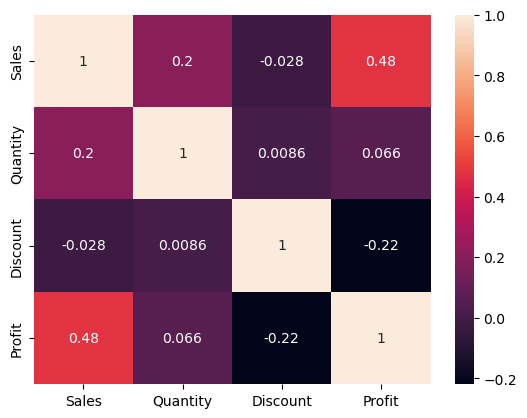

In [55]:
sns.heatmap(data = df[continious].corr(), annot = True)
plt.show()

**The correlation is very low on the continious columns**

In [56]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

**There is no null values in data set**

In [57]:
df.duplicated().sum()

np.int64(0)

**No duplicate values in data set**

boxplot ofSales


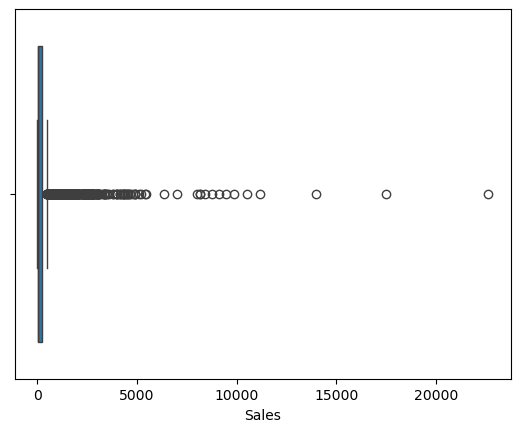

boxplot ofQuantity


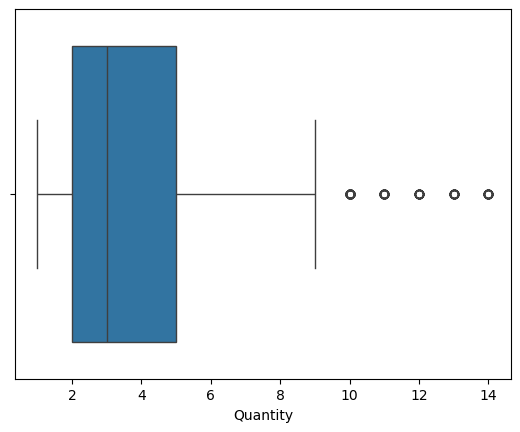

boxplot ofDiscount


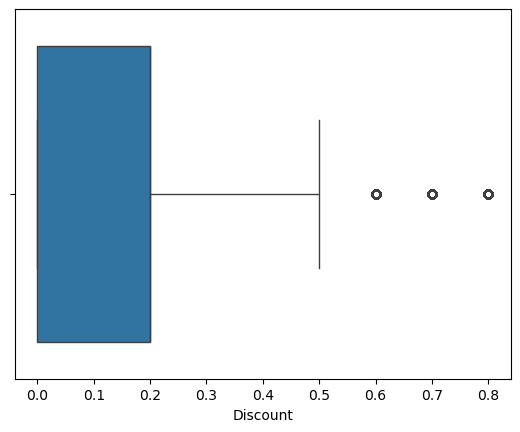

boxplot ofProfit


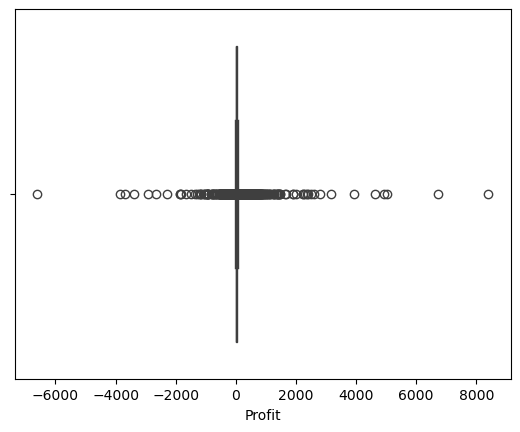

In [58]:
for col in continious:
  sns.boxplot(x = df[col])
  print(f"boxplot of{col}")
  plt.show()

**In continious column all columns have outliers**

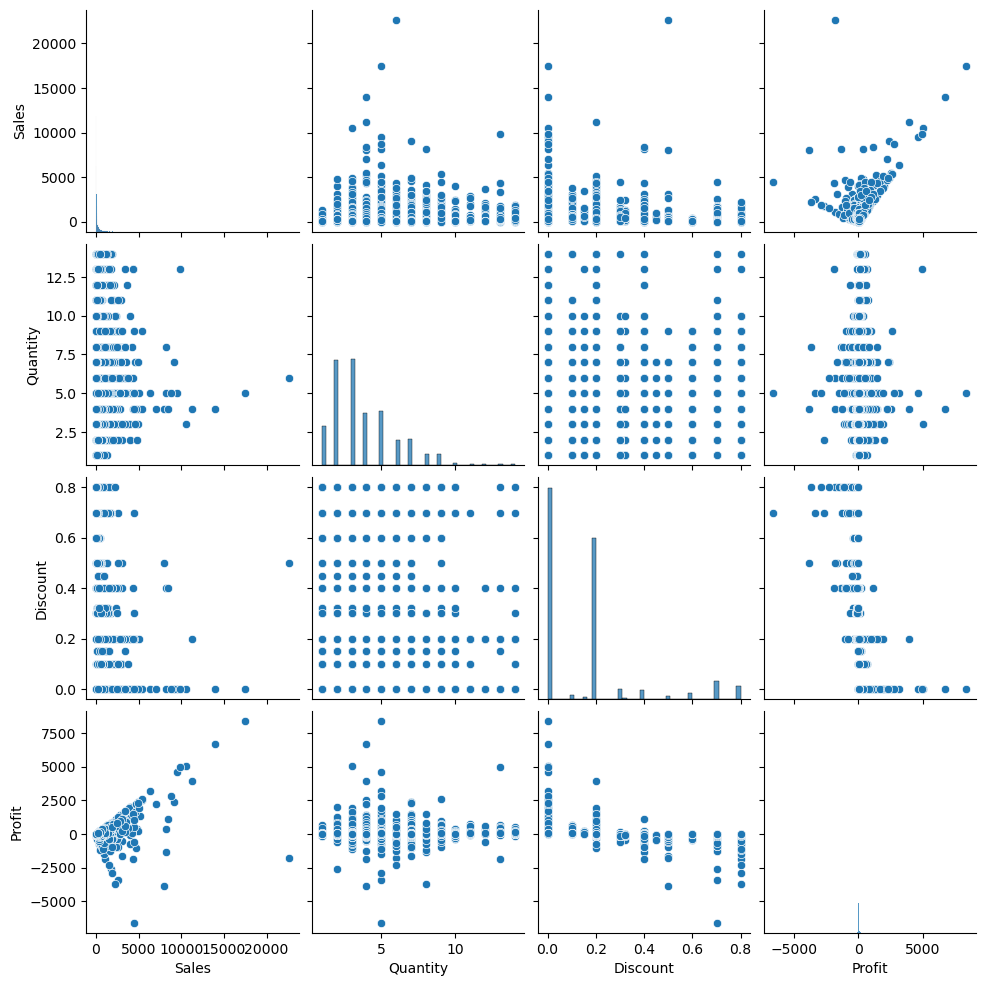

In [59]:
sns.pairplot(df[continious])
plt.show()

**The graph shows the histplot and scatterplot combining for each col in continious**

# 3.Data Cleaning

**A.Treat the wrong data**

In [60]:
# checking the data 
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


**all data correct format**

**B.Treat the wrong data type**

In [61]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

**Convert the objects into date format**

**C.Treat missing values**

In [62]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

**No missing values in data**

**D.Treat Duplicates**

In [63]:
df.duplicated().sum()

np.int64(0)

**No duplicate values in data**

**E. Treat outliers**

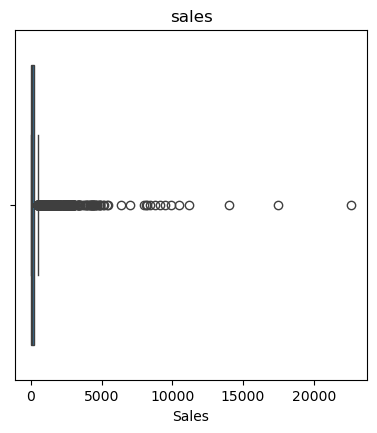

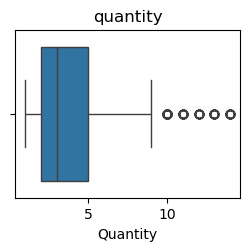

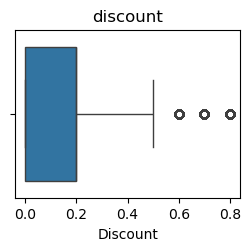

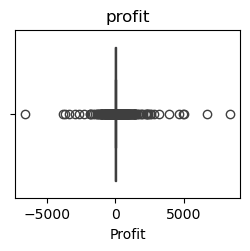

In [64]:
plt.figure(figsize = (10, 10))
plt.subplot(2, 2, 1)
sns.boxplot(x = df['Sales'], orient='H')
plt.title('sales')
plt.show()

plt.subplot(2, 2, 2)
sns.boxplot(x = df['Quantity'], orient='H')
plt.title('quantity')
plt.show()

plt.subplot(2, 2, 3)
sns.boxplot(x = df['Discount'], orient='H')
plt.title('discount')
plt.show()

plt.subplot(2, 2, 4)
sns.boxplot(x = df['Profit'], orient='H')
plt.title('profit')
plt.show()

**Outliers are present**
-  **Retrain the data** --> **because all are true values**

**F. Variable Selection**
-  i.e., adding or deleting the rows based on business problem

In [65]:
df.drop(columns=['Row ID', 'Order ID', 'Customer Name', 'Postal Code', 'Country'], inplace=True)

**Drop the columns**
-  Row Id -> Just a serial number, not useful.
-  Order ID -> Not needed unless analyzing individual orders.
-  Customer Name -> Redundant with Customer ID, not needed for analysis.
-  Postal Code -> Too granular for analysis unless you are doing zip-code level marketing (rare in this context).
-  Country -> All entries are from "United States", no variance.

**Feature Transformation**

In [66]:
df[continious].skew()

Sales       12.972752
Quantity     1.278545
Discount     1.684295
Profit       7.561432
dtype: float64

In [67]:
df['Sales_root'] = df['Sales'] ** (1/9)
df['Sales_root'].skew()

np.float64(0.5909339512941684)

In [68]:
df['Sales_log'] = np.log(df['Sales'] + 0.01)
df['Sales_log'].skew()

np.float64(0.18982500103231498)

In [69]:
df['Quantity_root'] = df['Quantity'] ** (1/8)
df['Quantity_root'].skew()

np.float64(0.028386782937852666)

In [70]:
df['Quantity_log'] = np.log(df['Quantity'] + 0.1)
df['Quantity_log'].skew() 

np.float64(-0.09892370509718759)

In [71]:
df['Discount_root'] = df['Discount'] ** (1/4)
df['Discount_root'].skew() 

np.float64(0.04267522226659267)

In [72]:
df['Discount_log'] = np.log(df['Discount'] + 0.01)
df['Discount_log'].skew()

np.float64(0.06468972602603787)

In [73]:
df['Profit_root'] = df['Profit'] ** (1/8)
df['Profit_root'].skew() 

np.float64(-0.037688130760671394)

In [74]:
df['Profit_log'] = np.log(df['Profit'] + 0.1)
df['Profit_log'].skew()

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


np.float64(0.04798557896403121)

In [75]:
df.drop(columns = ['Sales_root', 'Quantity_root', 'Discount_log', 'Profit_log', 'Sales', 'Quantity', 'Discount', 'Profit'],
        inplace = True)

# 4. Data Analysis & Visualization

# A. Univariate Analysis

**1. Sales**
- What to look at: Distribution, outliers, skewness.

- **Business Insight:** High variance could mean some products generate a disproportionate amount of revenue.

In [76]:
df['Sales_log'].describe()

count    9994.000000
mean        4.110263
std         1.642982
min        -0.789658
25%         2.850128
50%         3.998201
75%         5.346869
max        10.027407
Name: Sales_log, dtype: float64

**The minimum sales is 0.4 and max is 22638 and avg is 229**

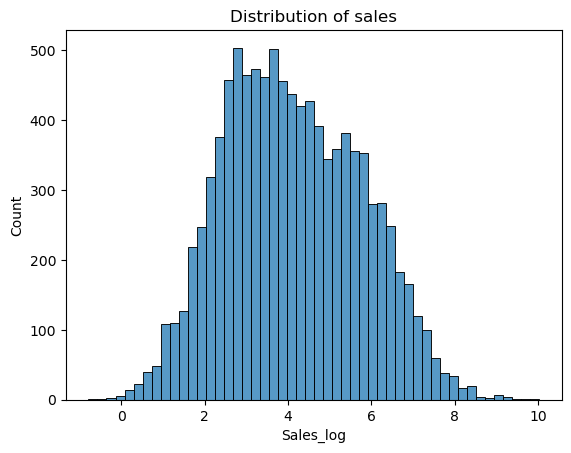

In [77]:
sns.histplot(x=df['Sales_log'], bins = 50)
plt.title('Distribution of sales')
plt.show()

**The sales distribution**

**2. Profit**
- What to look at: Positive vs. negative values, range, distribution.

- **Business Insight:** Identify if many orders are unprofitable despite high sales.

In [78]:
df['Profit_root'].describe()

count    8123.000000
mean        1.414519
std         0.308243
min         0.000000
25%         1.228647
50%         1.378915
75%         1.586675
max         3.094103
Name: Profit_root, dtype: float64

**The min profit is -6599 and max profit is 8399 and avg profit is 28**

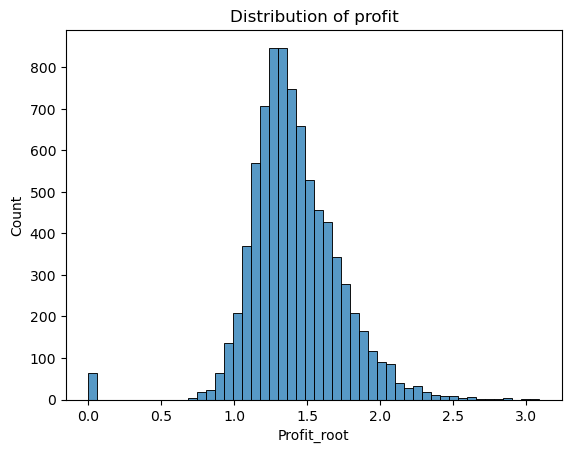

In [79]:
sns.histplot(x = df['Profit_root'], bins = 50)
plt.title('Distribution of profit')
plt.show()

**The graph shows the distribution of profit**

**3. Discount**
- What to look at: Common discount rates.
- Business Insight: If higher discounts often result in negative profit, that's a red flag.

In [80]:
df['Discount_root'].value_counts()/len(df) * 100

Discount_root
0.000000    48.008805
0.668740    36.591955
0.914691     4.182510
0.945742     3.001801
0.740083     2.271363
0.795271     2.061237
0.880112     1.380828
0.562341     0.940564
0.840896     0.660396
0.622333     0.520312
0.752121     0.270162
0.819036     0.110066
Name: count, dtype: float64

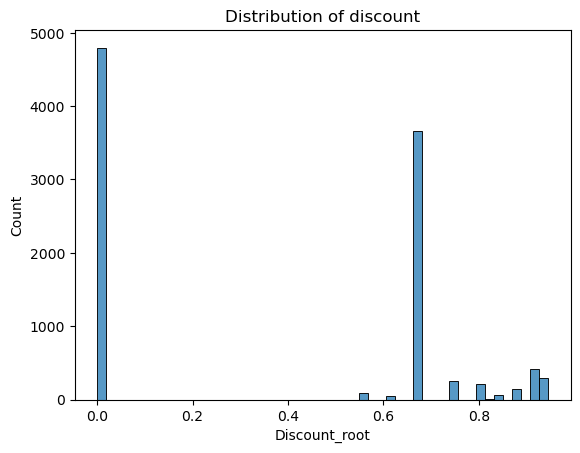

In [81]:
sns.histplot(x = df['Discount_root'], bins = 50)
plt.title('Distribution of discount')
plt.show()

**Graph has low discount with high count**

**4. Quantity**
- What to look at: Typical order sizes.

- Business Insight: Helps identify bulk vs. small quantity purchases.

In [82]:
df['Quantity_log'].describe()

count    9994.000000
mean        1.203173
std         0.565042
min         0.095310
25%         0.741937
50%         1.131402
75%         1.629241
max         2.646175
Name: Quantity_log, dtype: float64

**The quantity min is 1.0 and max is 14.0 and avg is 3.7**

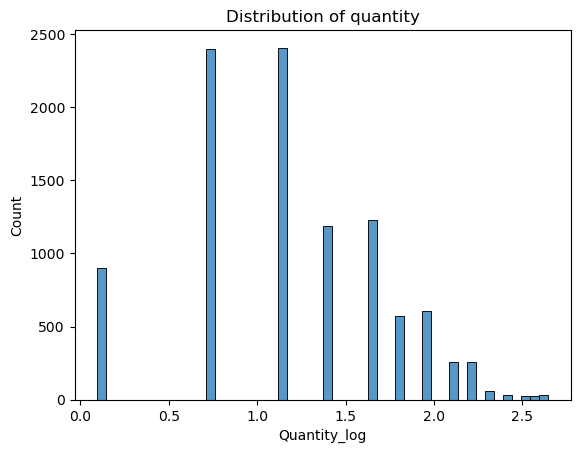

In [83]:
sns.histplot(x = df['Quantity_log'], bins = 50)
plt.title('Distribution of quantity')
plt.show()

**Quantity 2 & 3 has more orders**

**5. Category**
- What to look at: Count of orders per category.
- Business Insight: Which category is sold most often?

In [84]:
df['Category'].value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

**The more oders from office supplies**

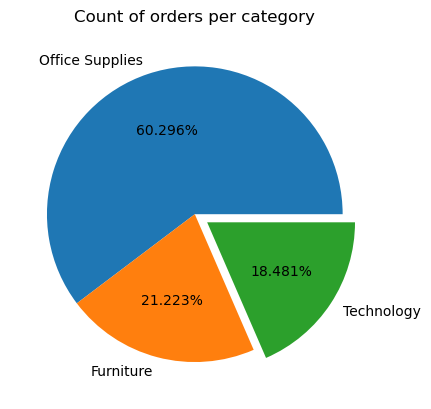

In [85]:
plt.pie(df['Category'].value_counts(), labels = df['Category'].value_counts().index, autopct = '%1.3f%%', explode=[0,0,0.1])
plt.title('Count of orders per category')
plt.show()

**More orders of office supplies**

**6. Sub-Category**
- What to look at: Most and least ordered sub-categories.
- Business Insight: Helps focus on popular vs. underperforming product types.

In [86]:
df['Sub-Category'].value_counts()

Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64

**The more oders from Binders**

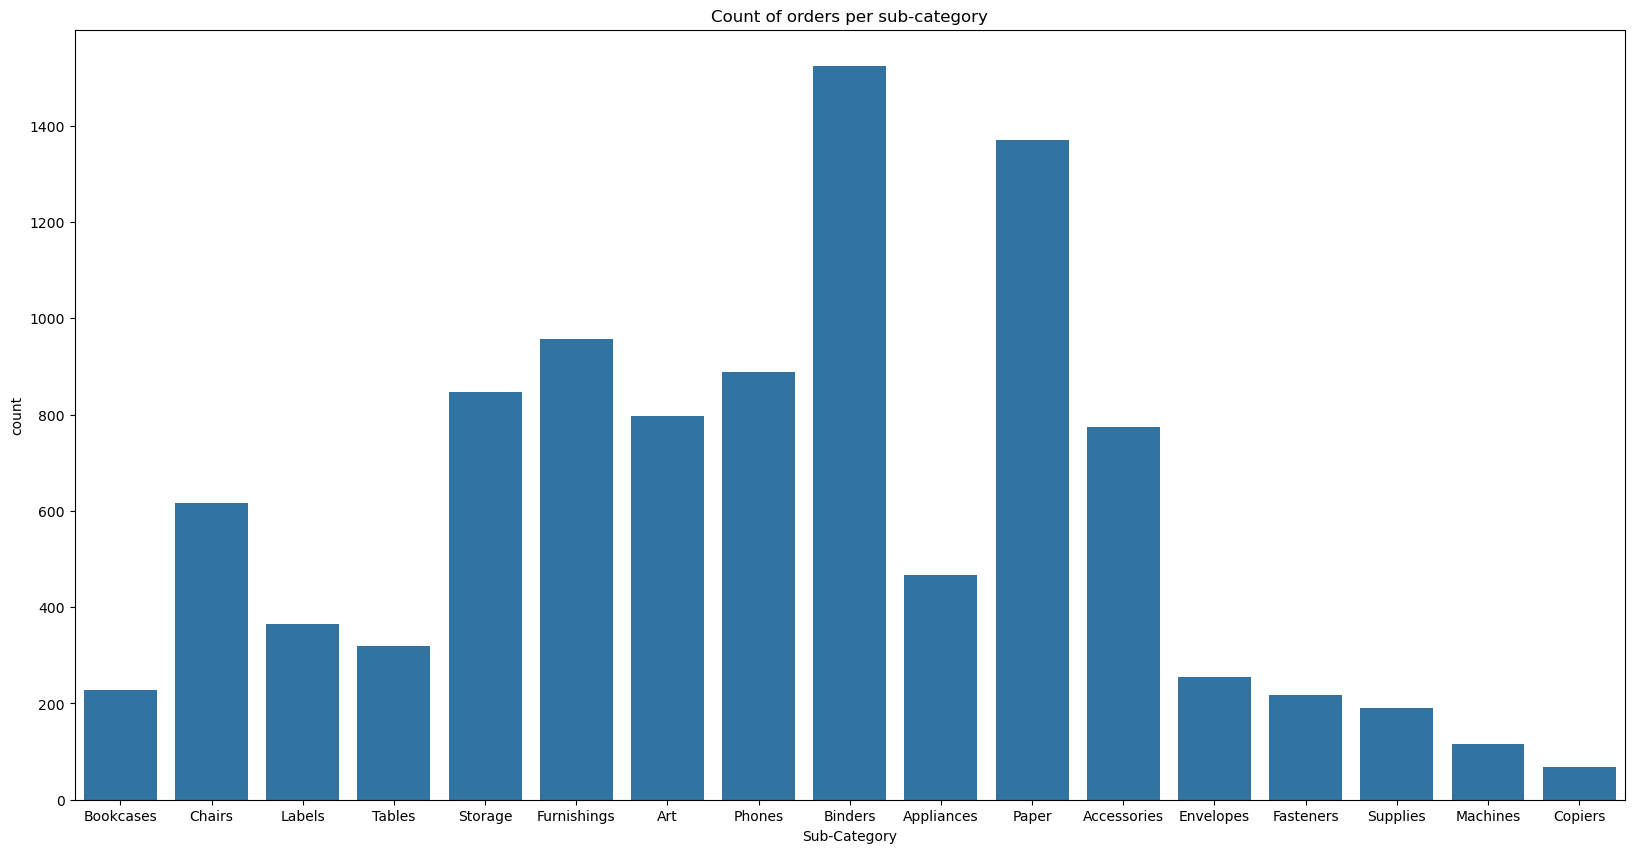

In [87]:
plt.figure(figsize = (20, 10))
sns.countplot(x = df['Sub-Category'])
plt.title('Count of orders per sub-category')
plt.show()

**The graph shows more orders from Binders**

**7. Region**
- What to look at: Number of orders per region.
- Business Insight: Evaluate regional demand and growth opportunity

In [88]:
df['Region'].value_counts()

Region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64

**More orders fom the west**

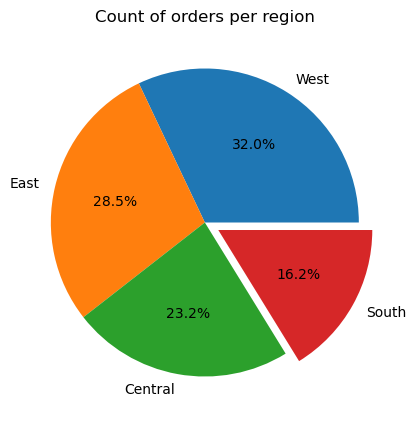

In [89]:
plt.figure(figsize = (5, 5))
plt.pie(df['Region'].value_counts(), labels = df['Region'].value_counts().index, autopct=('%1.1f%%'), explode=[0,0,0,0.1])
plt.title('Count of orders per region')
plt.show()

**The more orders from the west**

**8. Segment**
- What to look at: Which customer segment buys more.
- Business Insight: Optimize marketing towards the most profitable segment.

In [90]:
df['Segment'].value_counts()

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64

**More orders from the consumer**

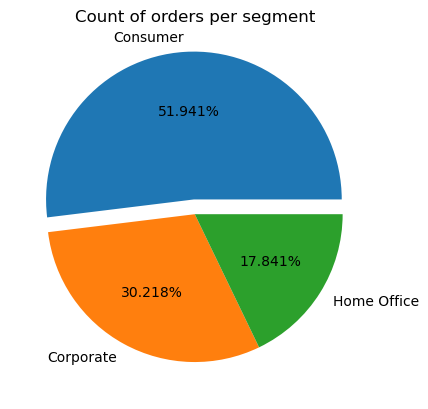

In [91]:
plt.pie(df['Segment'].value_counts(), labels = df['Segment'].value_counts().index, autopct = '%1.3f%%', explode=[0.1,0,0])
plt.title('Count of orders per segment')
plt.show()

**Consumer havr placed the more orders**

**9. Ship Mode**
- What to look at: Preference trends in shipping.
- Business Insight: Adjust logistics for cost-effective shipping based on demand.

In [92]:
df['Ship Mode'].value_counts()

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

**Standard class have more oders**

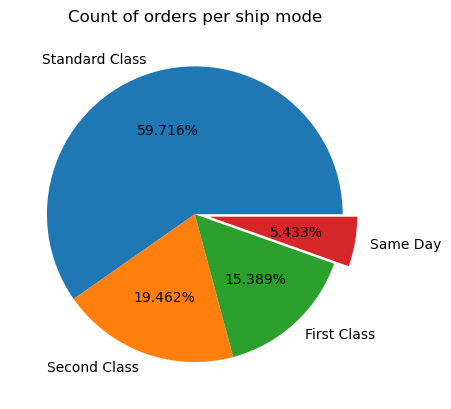

In [93]:
plt.pie(df['Ship Mode'].value_counts(), labels = df['Ship Mode'].value_counts().index, autopct = '%1.3f%%', explode=[0,0,0,0.1])
plt.title('Count of orders per ship mode')
plt.show()

**The less orders from the same day**

# B.Bivariate Analysis

**1. Sales vs Profit**
- Goal: Understand if high sales correlate with high profit.
- Insight: Some high-sale items may still lead to losses.

In [94]:
df[['Sales_log', 'Profit_root']].corr()

,Sales_log,Profit_root
Sales_log,1.000000,0.776838
Profit_root,0.776838,1.000000


**Sales and profit have low correlation**

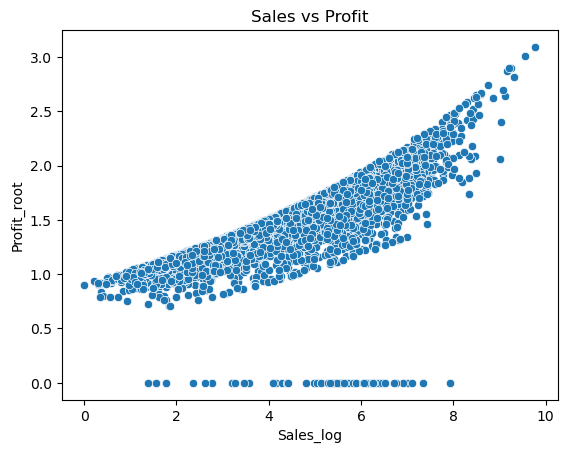

In [95]:
sns.scatterplot(x = df['Sales_log'], y = df['Profit_root'])
plt.title('Sales vs Profit')
plt.show()

**The profit increseas sales decreses**

**2. Discount vs Profit**
- Goal: Understand how discounting affects profit.
- Insight: Large discounts might be destroying profit margins.

In [96]:
df[['Discount_root', 'Profit_root']].corr()

,Discount_root,Profit_root
Discount_root,1.000000,-0.172006
Profit_root,-0.172006,1.000000


**a weak negative correlation between Discount and Profit.**

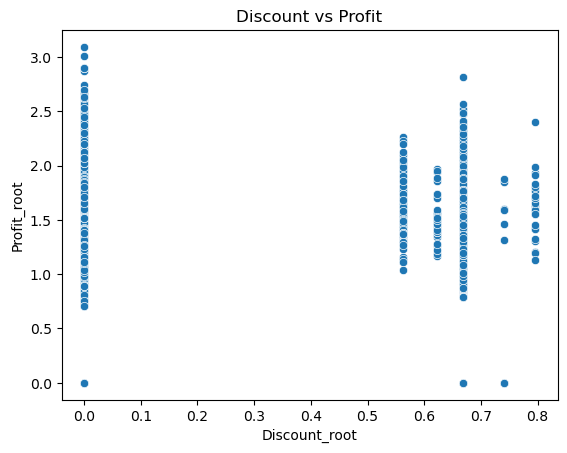

In [97]:
sns.scatterplot(x = df['Discount_root'], y = df['Profit_root'])
plt.title('Discount vs Profit')
plt.show()

** 0 discount have high profits**

**3. Category vs Profit**
- Goal: See how each product category contributes to profit.
- Insight: Identify the most and least profitable categories.

In [98]:
df.groupby('Category')['Profit_root'].sum()

Category
Furniture          2062.157875
Office Supplies    6945.525101
Technology         2482.457392
Name: Profit_root, dtype: float64

**Technology and Office Supplies are the most profitable categories, while Furniture has the lowest total profit.**

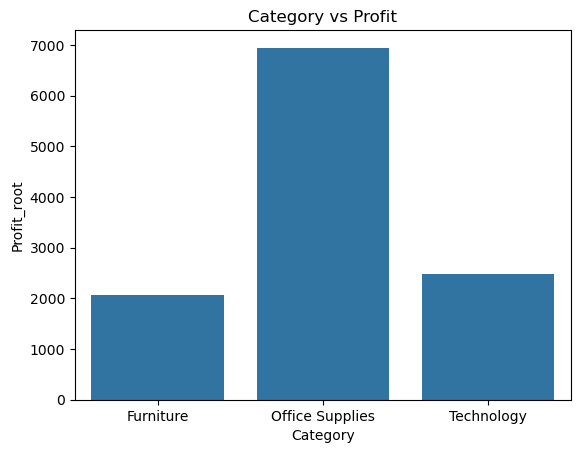

In [99]:
sns.barplot(x = df.groupby('Category')['Profit_root'].sum().index, y = df.groupby('Category')['Profit_root'].sum())
plt.title('Category vs Profit')
plt.show()

**Technology have the most profitable category while compared to others**

**4. Segment vs Profit**
- Goal: Determine profitability of customer segments.
- Insight: Target the most profitable segment (e.g., Corporate vs Consumer).

In [100]:
df.groupby('Segment')['Profit_root'].sum()

Segment
Consumer       5899.314383
Corporate      3499.872634
Home Office    2090.953351
Name: Profit_root, dtype: float64

**Consumer have the more profit**

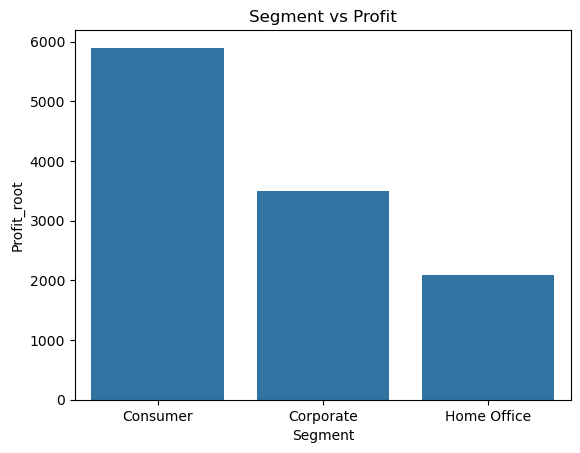

In [101]:
sns.barplot(x = df.groupby('Segment')['Profit_root'].sum().index, y = df.groupby('Segment')['Profit_root'].sum())
plt.title('Segment vs Profit')
plt.show()

**Segment of Consumer has the more profit**

**5. Region vs Profit**
- Goal: Evaluate regional performance.
- Insight: Allocate marketing and logistics budgets wisely.

In [102]:
df.groupby('Region')['Profit_root'].sum()

Region
Central    2234.061757
East       3252.293887
South      1925.362107
West       4078.422617
Name: Profit_root, dtype: float64

**The west Region has the more profit**

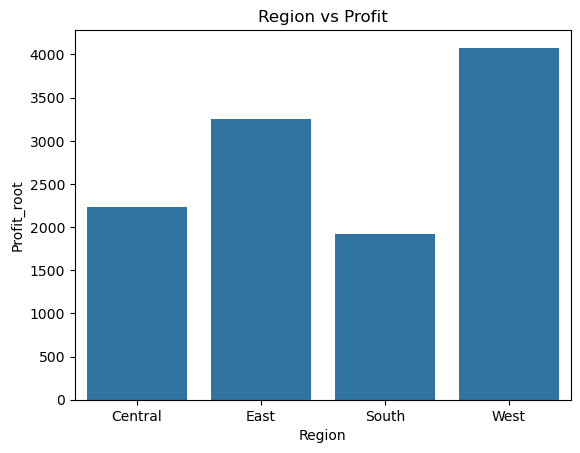

In [103]:
sns.barplot(x = df.groupby('Region')['Profit_root'].sum().index, y = df.groupby('Region')['Profit_root'].sum())
plt.title('Region vs Profit')
plt.show()

**The west region has the more profit**

**6. Ship Mode vs Profit**
- Goal: Understand the financial impact of shipping modes.
- Insight: Some modes may be costly even if fast.

In [104]:
df.groupby('Ship Mode')['Profit_root'].sum()

Ship Mode
First Class       1760.803281
Same Day           634.180662
Second Class      2329.770207
Standard Class    6765.386217
Name: Profit_root, dtype: float64

**The ship mode has the standard class orders are more**

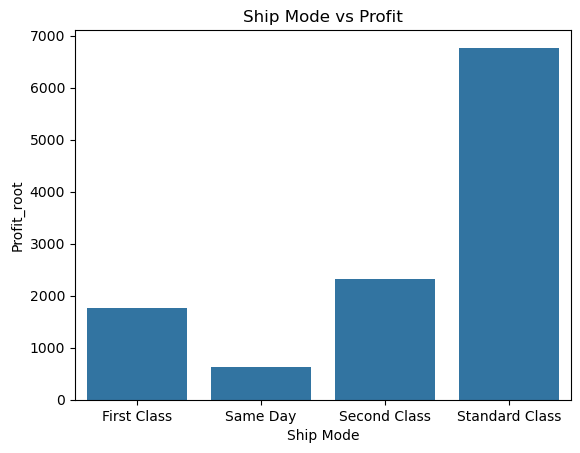

In [105]:
sns.barplot(x = df.groupby('Ship Mode')['Profit_root'].sum().index, y = df.groupby('Ship Mode')['Profit_root'].sum())
plt.title('Ship Mode vs Profit')
plt.show()

**ship mode of standard class have more profit**

**7. Category vs Discount**
- Goal: Identify where most discounts are being given.
- Insight: You may be over-discounting certain categories.

In [106]:
df.groupby('Category')['Discount_root'].mean()

Category
Furniture          0.433861
Office Supplies    0.350514
Technology         0.380371
Name: Discount_root, dtype: float64

**The furniture category has more discount**

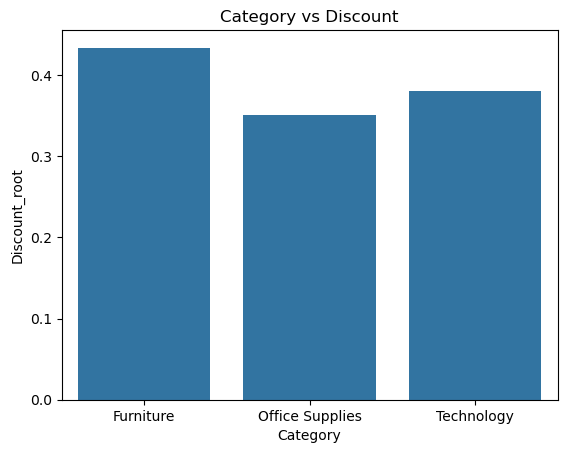

In [107]:
sns.barplot(x = df.groupby('Category')['Discount_root'].mean().index, y = df.groupby('Category')['Discount_root'].mean())
plt.title('Category vs Discount')
plt.show()

**The furniture has more discount**

# C.Multivariate Analysis

**1. Segment vs Region vs Profit**
- Goal: Find the most profitable combinations of segment and region.
- Insight: Tailor marketing and logistics per region & segment.

In [108]:
df.groupby(['Segment', 'Region'])['Profit_root'].sum()

Segment      Region 
Consumer     Central    1102.985440
             East       1668.536147
             South      1006.306527
             West       2121.486268
Corporate    Central     672.991934
             East        994.833031
             South       600.789953
             West       1231.257716
Home Office  Central     458.084383
             East        588.924709
             South       318.265627
             West        725.678632
Name: Profit_root, dtype: float64

**For all segments, the West region is the most profitable.**

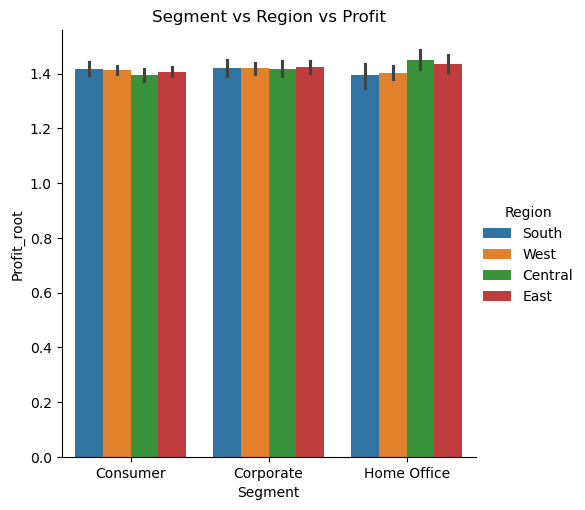

In [109]:
sns.catplot(x = 'Segment', y = 'Profit_root', hue = 'Region', data = df, kind = 'bar')
plt.title('Segment vs Region vs Profit')
plt.show()

**The west region has the most profitable**

**2. Category vs Discount vs Profit**
- Goal: Check how discounts impact profits across categories.
- Insight: Identify over-discounted categories causing losses.

In [110]:
df.groupby(['Category', 'Discount_root'])['Profit_root'].sum()

Category         Discount_root
Furniture        0.000000         1287.306339
                 0.562341          117.305686
                 0.622333           53.281849
                 0.668740          601.205957
                 0.740083            3.058045
                 0.752121            0.000000
                 0.795271            0.000000
                 0.819036            0.000000
                 0.840896            0.000000
                 0.880112            0.000000
                 0.914691            0.000000
Office Supplies  0.000000         4348.806792
                 0.562341           25.974167
                 0.668740         2570.744142
                 0.914691            0.000000
                 0.945742            0.000000
Technology       0.000000         1357.781363
                 0.562341            4.133732
                 0.668740         1071.834938
                 0.740083            6.647315
                 0.795271           42.060043
   

**Categories with high discounts (especially 0.40, 0.50, and 0.70) often result in negative profits.**

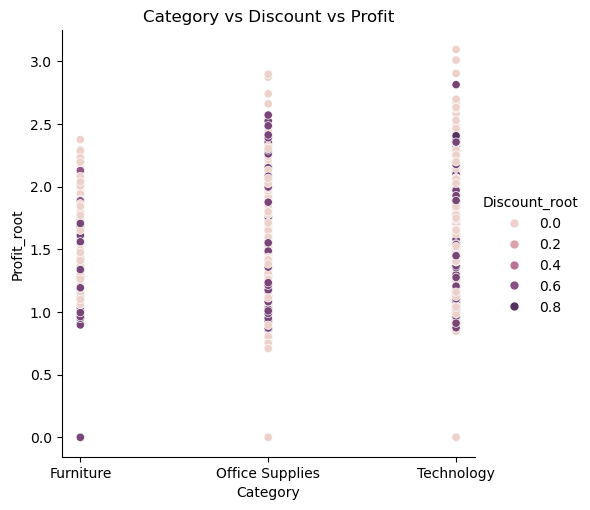

In [111]:
sns.relplot(x = 'Category', y = 'Profit_root', hue = 'Discount_root', data = df)
plt.title('Category vs Discount vs Profit')
plt.show()

**The graph shows the high discount with negetive profits**

**3. Region vs Category vs Sales**
- Goal: Understand what categories perform well by region.
- Insight: Improve inventory and supply chain efficiency.


In [112]:
df.groupby(['Region', 'Category'])['Sales_log'].sum()

Region   Category       
Central  Furniture          2333.761663
         Office Supplies    4742.381350
         Technology         2122.248054
East     Furniture          2990.130019
         Office Supplies    6007.414900
         Technology         2758.105720
South    Furniture          1642.100601
         Office Supplies    3517.077167
         Technology         1503.522130
West     Furniture          3564.238821
         Office Supplies    6775.915881
         Technology         3121.071886
Name: Sales_log, dtype: float64

**Across all regions, Technology consistently has the highest total sales, followed by Furniture and then Office Supplies.**

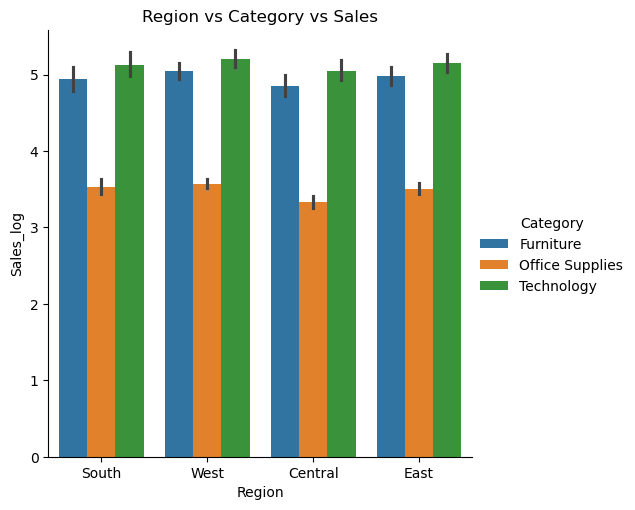

In [113]:
sns.catplot(x = 'Region', y = 'Sales_log', hue = 'Category', data = df, kind = 'bar')
plt.title('Region vs Category vs Sales')
plt.show()

**Technology has the more sales**

**4. Segment vs Ship Mode vs Profit**
- Goal: Identify profitable combinations of segment and shipping.
- Insight: Optimize delivery strategies by segment.

In [114]:
df.groupby(['Segment', 'Ship Mode'])['Profit_root'].sum()

Segment      Ship Mode     
Consumer     First Class        876.037119
             Same Day           362.962265
             Second Class      1194.098803
             Standard Class    3466.216196
Corporate    First Class        565.985817
             Same Day           137.373277
             Second Class       731.770219
             Standard Class    2064.743320
Home Office  First Class        318.780345
             Same Day           133.845120
             Second Class       403.901185
             Standard Class    1234.426701
Name: Profit_root, dtype: float64

**For all segments, Standard Class shipping mode results in the highest profit.**

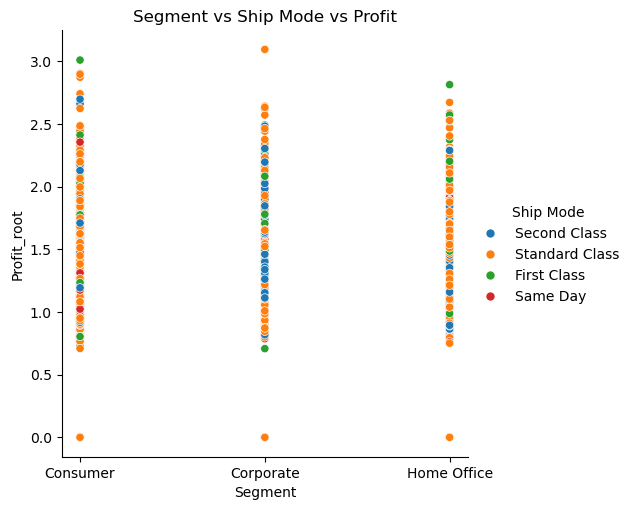

In [115]:
sns.relplot(x = 'Segment', y = 'Profit_root', hue = 'Ship Mode', data = df)
plt.title('Segment vs Ship Mode vs Profit')
plt.show()

**The segment has the Standard class are more orders**

**5. Quantity vs Discount vs Profit**
- Goal: Examine how buying more with discounts impacts profit.
- Insight: Avoid situations where bulk buying leads to loss.

In [116]:
df.groupby(['Quantity_log', 'Discount_root'])['Profit_root'].sum()

Quantity_log  Discount_root
0.095310      0.000000         560.571041
              0.562341          12.310809
              0.622333           2.731057
              0.668740         319.208661
              0.740083           1.462824
                                  ...    
2.646175      0.668740          14.293734
              0.740083           0.000000
              0.795271           1.709063
              0.914691           0.000000
              0.945742           0.000000
Name: Profit_root, Length: 133, dtype: float64

**profit for each combination of quantity and discount.**

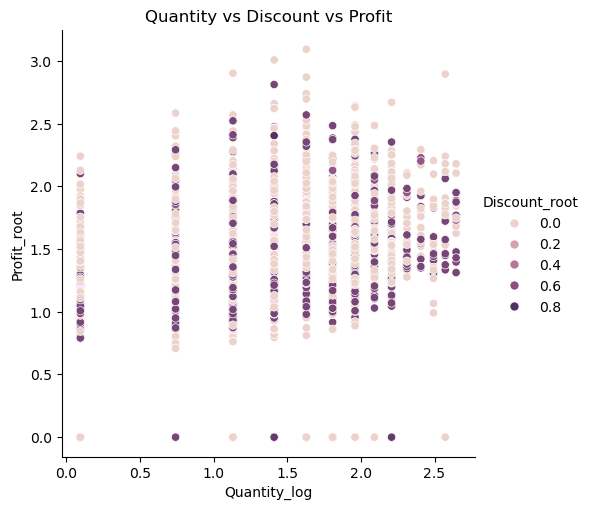

In [117]:
sns.relplot(x = 'Quantity_log', y = 'Profit_root', hue = 'Discount_root', data = df)
plt.title('Quantity vs Discount vs Profit')
plt.show()

**The 2 & 4 quantity have the more profit**

# Obsrvations

**1. Discounts Often Lead to Losses**
- Observation: Orders with high discounts (>= 30%) frequently result in negative profit, especially in the Technology and Office Supplies categories.

- Business Insight: Heavy discounting isn’t sustainable. Review your discount policy—particularly for sub-categories like Binders, Phones, and Tables.

**2. Top-Selling ≠ Most Profitable**
- Observation: Products like Chairs and Tables have high sales but also high return/loss values.

- Business Insight: Focus not just on volume but on net profitability. Promote products with high profit margins, not just high sales.

**3. Regional Profit Disparities**
- Observation: The West and East regions consistently outperform the South and Central in both sales and profit.

- Business Insight: Invest more in marketing and logistics in profitable regions. Consider improving pricing or operational efficiency in underperforming ones.

**4. Segment-Wise Performance**
- Observation: The Corporate and Home Office segments are more profitable than the Consumer segment, despite fewer transactions.

- Business Insight: These segments are worth targeting with tailored offers or B2B deals to maximize ROI.

**5. Shipping Modes Affect Profit**
- Observation: Same Day and First Class shipping modes are less profitable compared to Standard Class.

- Business Insight: Offer premium shipping only as upsells, or for high-margin products/customers.

**6. Quantity Ordered Doesn't Always Mean More Profit**
- Observation: Higher quantities often correlate with larger discounts, leading to lower or negative profit.

- Business Insight: Monitor bulk orders and set minimum margin thresholds.

**Key Observations & Insights**
🛒 1. Sales vs. Profit

High sales ≠ high profit: Some products or categories have high sales but contribute negatively to profit due to high discounts or low margins.

Furniture category often has lower profit margins compared to Technology.

🌍 2. Regional Performance

West and East regions generate higher sales and profit.

Central and South show relatively lower profitability — may need targeted strategies or cost optimization.

👥 3. Customer Segments

Consumer segment forms the bulk of customers.

Corporate and Home Office segments show good profit margins — potential for upselling and loyalty programs.

📦 4. Product Categories & Sub-Categories

Technology category is the most profitable.

Tables and Bookcases in the Furniture category often generate losses — possible over-discounting or excess inventory.

Office Supplies have moderate sales but low profit.

📉 5. Discount Impact

High discounts are strongly associated with low or negative profits.

Suggest tightening discount strategies and focusing on full-margin sales for specific products.

⏱️ 6. Shipping and Dates

Most orders are shipped within a week.

Faster shipping modes (like Same Day) are used less frequently but may correlate with higher satisfaction.

✅ Actionable Recommendations

Reduce or reevaluate discounts on low-margin items.

Focus marketing on profitable regions (West, East).

Upsell high-margin tech items to Corporate and Home Office segments.

Investigate loss-making sub-categories like Tables and Bookcases.

Optimize shipping costs for regions with lower profitability.

